# Problem Statement : Lithium Battery Degradation

### The aim of this project is to analyse the degradation of Lithium-ion Batteries during their charging cycles. We will be trying to build a model to accurately predict the change in SEI (Solid Electrolyte Interphase) Layer in the batteries and to study their impact in various important parameters of the battery such as SOH (State of Health), SOC (State of Charge). 

#### This dataset is generated by P2D model for Li-ion battery, the output will be the degradation of battery during charging.

##### -- The model is based upon Porous Electrode Theory and Concentrated Solution Theory.

## Dataset Description
### This dataset is generated by Porous Electrode Pseudo 2-dimensional Model (P2D).
### The assumption of this current model:
1. The battery opperates in 23 degree C
2. Degradation of the only happens during charging
3. initial SoC 0.2
4. initial SoH 1e-8
Dataset
1. SOC = State of charge of the battery (0% = empty; 100% = full)
2. SOH = State of Health of the battery (It is determined by the thickness of the SEI layer)
3. Power = output power (positive sign represets charging; negative sign represents discharging.)

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
battery_df = pd.read_csv('data0505.csv')

In [8]:
battery_df.head() # Solid Electrolyte Interphase

,SOC,SOH,Power,T,SEI_after,SEI_delta
0,80,1.0,-1.00000,23,1.000000e-08,-0.003660
1,80,1.0,-0.89474,23,1.000000e-08,-0.001314
2,80,1.0,-0.78947,23,1.000000e-08,0.004721
3,80,1.0,-0.68421,23,1.000000e-08,-0.001936
4,80,1.0,-0.57895,23,1.000000e-08,0.003147


In [9]:
battery_df.shape

(12200, 6)

In [10]:
battery_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12200 entries, 0 to 12199
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SOC        12200 non-null  int64  
 1   SOH        12200 non-null  float64
 2   Power      12200 non-null  float64
 3   T          12200 non-null  int64  
 4   SEI_after  12171 non-null  float64
 5   SEI_delta  12171 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 572.0 KB


In [11]:
battery_df.describe()

,SOC,SOH,Power,T,SEI_after,SEI_delta
count,12200.000000,12200.000000,1.220000e+04,12200.0,1.217100e+04,12171.000000
mean,50.000000,1.500000,6.370132e-20,23.0,1.499019e-08,24.815331
std,17.607538,0.319167,6.070016e-01,0.0,3.189017e-09,24.910959
min,20.000000,1.000000,-1.000000e+00,23.0,1.000000e-08,-0.014999
25%,35.000000,1.222200,-4.999975e-01,23.0,1.222200e-08,0.000013
50%,50.000000,1.500000,0.000000e+00,23.0,1.444401e-08,43.975660
75%,65.000000,1.777800,4.999975e-01,23.0,1.777800e-08,49.607178
max,80.000000,2.000000,1.000000e+00,23.0,2.000001e-08,59.041066


# EDA VISUALIZATIONS

## SOC Vs Temperature

Text(0.5, 1.0, 'SOC Vs Temperature')

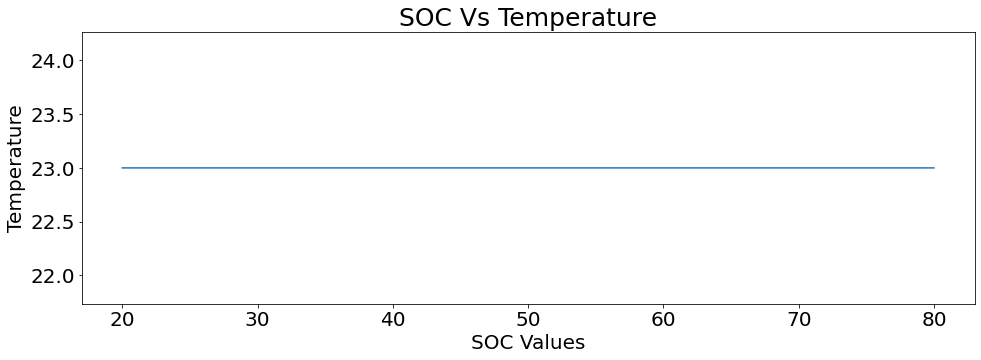

In [12]:
plt.figure(figsize=(16,5))
plt.plot(battery_df['SOC'],battery_df['T'])
plt.xlabel('SOC Values',fontsize=20)
plt.ylabel('Temperature',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('SOC Vs Temperature',fontsize=25)

## SOC Vs Power

Text(0.5, 1.0, 'SOC Vs POWER')

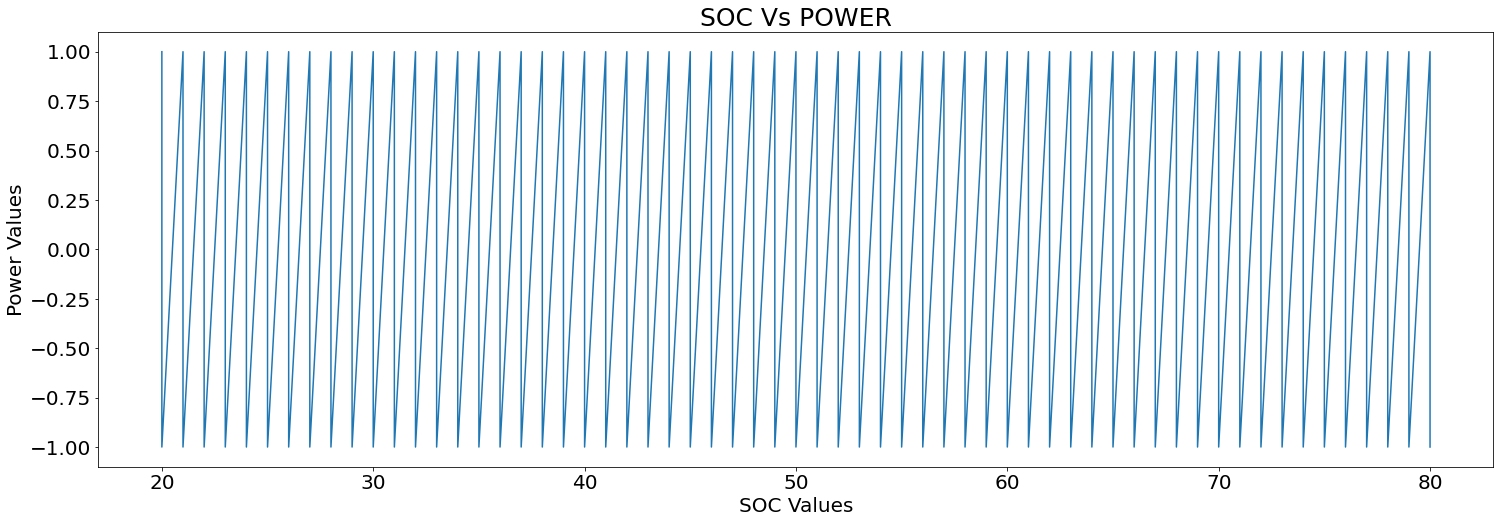

In [13]:
plt.figure(figsize=(25,8))
plt.plot(battery_df['SOC'],battery_df['Power'])
plt.xlabel('SOC Values',fontsize=20)
plt.ylabel('Power Values',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('SOC Vs POWER',fontsize=25)

Text(0.5, 1.0, 'SOC Vs NORMALIZED POWER')

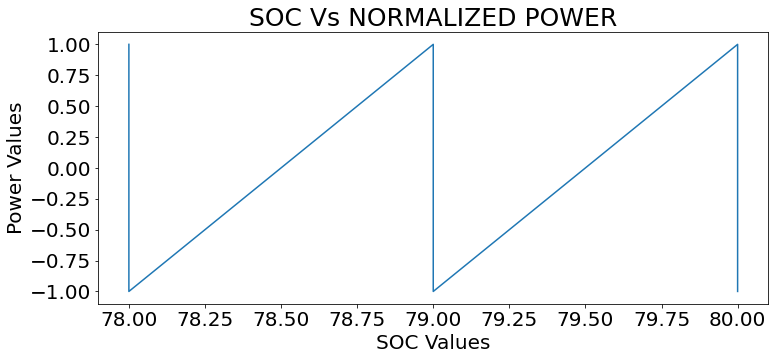

In [14]:
plt.figure(figsize=(12,5))
plt.plot(battery_df['SOC'][:600],battery_df['Power'][:600])
plt.xlabel('SOC Values',fontsize=20)
plt.ylabel('Power Values',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('SOC Vs NORMALIZED POWER',fontsize=25)

## SOC Vs SEI_after

Text(0.5, 1.0, 'SOC Vs SEI After')

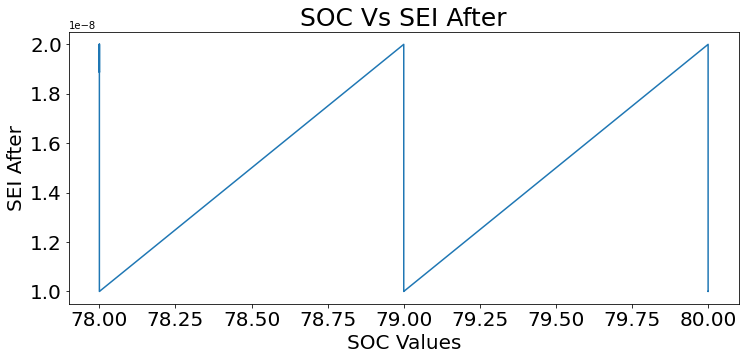

In [15]:
plt.figure(figsize=(12,5))
plt.plot(battery_df['SOC'][:600],battery_df['SEI_after'][:600])
plt.xlabel('SOC Values',fontsize=20)
plt.ylabel('SEI After',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('SOC Vs SEI After',fontsize=25)

## SOC Vs SEI_delta

Text(0.5, 1.0, 'SOC Vs SEI Delta')

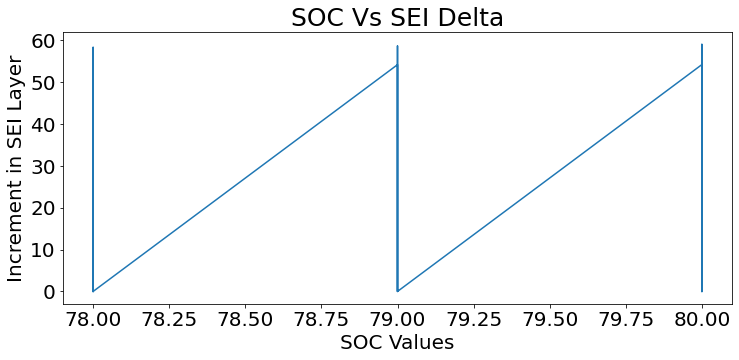

In [16]:
plt.figure(figsize=(12,5))
plt.plot(battery_df['SOC'][:600],battery_df['SEI_delta'][:600])
plt.xlabel('SOC Values',fontsize=20)
plt.ylabel('Increment in SEI Layer',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('SOC Vs SEI Delta',fontsize=25)

In [17]:
unique_power = battery_df['Power'].unique()

negative_power = unique_power[0:10]
positive_power = unique_power[10:]

print('POSITIVE POWER', positive_power)
print('NEGATIVE POWER', negative_power)

POSITIVE POWER [0.052632 0.15789  0.26316  0.36842  0.47368  0.57895  0.68421  0.78947
 0.89474  1.      ]
NEGATIVE POWER [-1.       -0.89474  -0.78947  -0.68421  -0.57895  -0.47368  -0.36842
 -0.26316  -0.15789  -0.052632]


Text(0.5, 1.0, 'SOH Vs SEI_delta (Negative Power)')

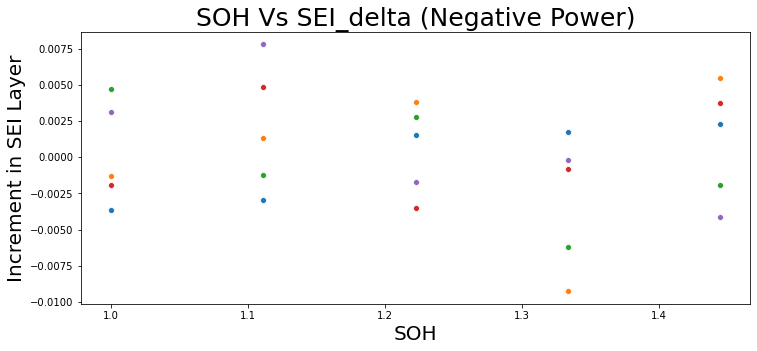

In [18]:
plt.figure(figsize=(12,5))
for power in negative_power[:5]:
    new_battery_df = battery_df[battery_df['Power']==power]
    sns.scatterplot(new_battery_df['SOH'][:5],new_battery_df['SEI_delta'][:5])
plt.xlabel('SOH',fontsize=20)
plt.ylabel('Increment in SEI Layer',fontsize=20)
plt.title('SOH Vs SEI_delta (Negative Power)',fontsize=25)

Text(0.5, 1.0, 'SOH Vs SEI_delta (Positive Power)')

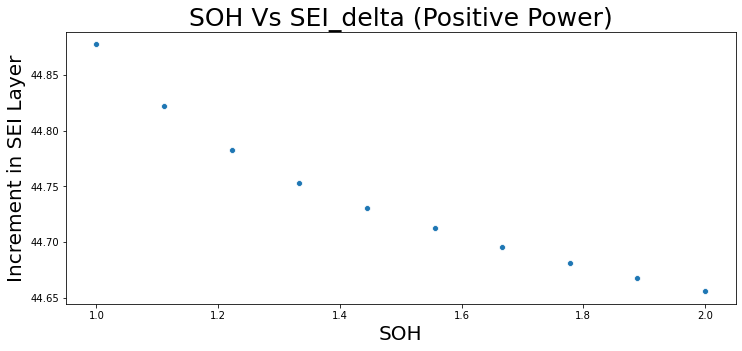

In [19]:
plt.figure(figsize=(12,5))
for power in positive_power[:1]:
    new_battery_df = battery_df[battery_df['Power']==power]
    sns.scatterplot(new_battery_df['SOH'][:10],new_battery_df['SEI_delta'][:10])
plt.xlabel('SOH',fontsize=20)
plt.ylabel('Increment in SEI Layer',fontsize=20)
plt.title('SOH Vs SEI_delta (Positive Power)',fontsize=25)

## Normalized Power Vs SEI_delta Scatter-Plot when Charging

Text(0.5, 1.0, 'Normalized Power Vs SEI Delta')

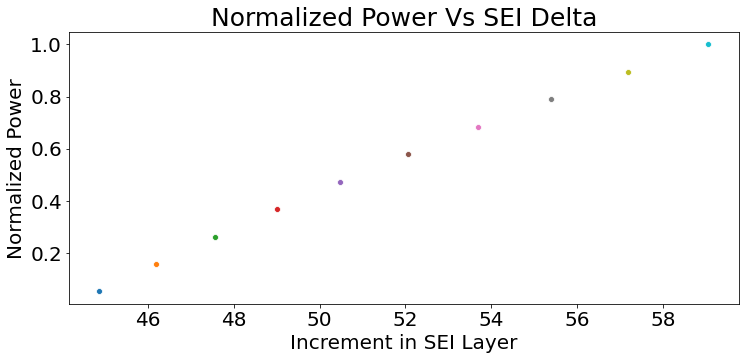

In [20]:
plt.figure(figsize=(12,5))
for power in positive_power:
    new_battery_df = battery_df[battery_df['Power']==power]
    sns.scatterplot(new_battery_df['SEI_delta'][:1],new_battery_df['Power'][:1])
plt.ylabel('Normalized Power',fontsize=20)
plt.xlabel('Increment in SEI Layer',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Normalized Power Vs SEI Delta',fontsize=25)

## Normalized Power Vs SEI_delta Scatter-Plot when Discharging

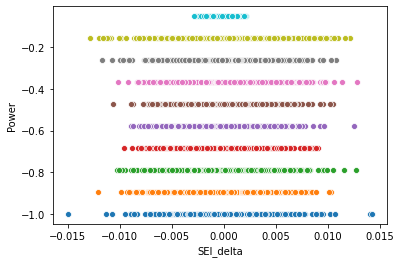

In [21]:
for power in negative_power:
    new_battery_df = battery_df[battery_df['Power']==power]
    sns.scatterplot(new_battery_df['SEI_delta'],new_battery_df['Power'])

In [22]:
# battery_df[battery_df['SEI_delta']<0].head(30)

In [23]:
# battery_df[battery_df['SEI_delta']>0].head(30)

## Filtering the Dataset to Consider only the Charging Cycle

In [24]:

battery_df=battery_df[battery_df['Power']>=0]
battery_df=battery_df[battery_df['SOC']>0]
battery_df=battery_df[battery_df['SOH']>0]
battery_df=battery_df[battery_df['SEI_delta']>0]
battery_df.head()

,SOC,SOH,Power,T,SEI_after,SEI_delta
10,80,1.0,0.052632,23,1.000000e-08,44.877633
11,80,1.0,0.157890,23,1.000000e-08,46.189571
12,80,1.0,0.263160,23,1.000000e-08,47.560540
13,80,1.0,0.368420,23,1.000000e-08,48.999841
14,80,1.0,0.473680,23,1.000001e-08,50.481875


## Performing MinMax Scaling

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
battery_df = pd.DataFrame(scaler.fit_transform(battery_df),columns=battery_df.columns)

In [26]:
battery_df.isnull().sum()

SOC          0
SOH          0
Power        0
T            0
SEI_after    0
SEI_delta    0
dtype: int64

In [27]:
battery_df.dropna(axis=0,inplace=True)

## Importing Required Libraries for Modeling

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_validate,train_test_split,cross_val_score


## Separating Dependent and Independent Variables.
### Followed by splitting them into train-test splits

In [29]:
x = battery_df.drop('SEI_delta',axis=1)
y=battery_df['SEI_delta']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


#### Creating Instance of Linear Regression Model

In [30]:
LReg = LinearRegression()

#### Fitting the model into the Training Dataset

In [31]:
LReg.fit(x_train,y_train)

LinearRegression()

In [32]:
LReg.score(x_train,y_train)

1.0

## Predicting SEI_delta(change in SEI Layer) on Training Data

In [33]:
train_predict = LReg.predict(x_train)
mae = mean_absolute_error(y_train,train_predict)
mse = mean_squared_error(y_train,train_predict)
print('Mean absolute error for training data is = ',mae)
print('Mean squared error for training data is = ',mse)
print('Root Mean square error for training data is = ',np.sqrt(mse))

Mean absolute error for training data is =  1.1401082650786356e-09
Mean squared error for training data is =  2.0480365213265527e-18
Root Mean square error for training data is =  1.4310962655693546e-09


## Predicting SEI_delta(change in SEI Layer) on Testing Data

In [34]:
test_predict=LReg.predict(x_test)
mae = mean_absolute_error(y_test,test_predict)
mse = mean_squared_error(y_test,test_predict)
print('Mean absolute error for testing data is = ',mae)
print('Mean squared error for testing data is = ',mse)
print('Root Mean square error for testing data is = ',np.sqrt(mse))

Mean absolute error for testing data is =  1.0909686241884078e-09
Mean squared error for testing data is =  1.9217417531982998e-18
Root Mean square error for testing data is =  1.3862690046301618e-09


## Plotting SEI_delta values for Theoretical and Predicted Data

Text(0.5, 1.0, 'Theoretical Vs Predicted Change in SEI Layer Values')

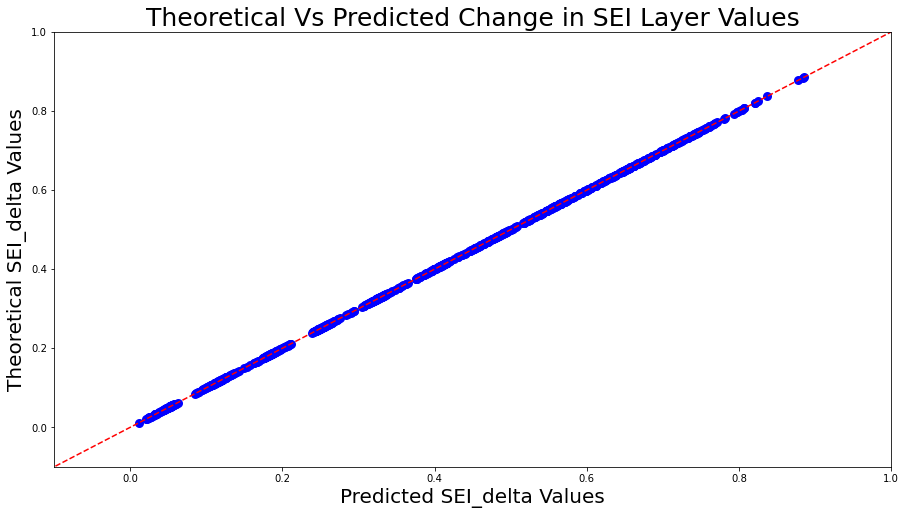

In [35]:
plt.figure(figsize=(15,8))
plt.scatter(test_predict, y_test,linewidths=3,color='blue')
plt.plot(range(-1,2),range(-1,2),'r--')
plt.ylim([-0.1,1])
plt.xlim([-0.1,1])
plt.xlabel('Predicted SEI_delta Values',fontsize=20)
plt.ylabel('Theoretical SEI_delta Values',fontsize=20)
plt.title('Theoretical Vs Predicted Change in SEI Layer Values',fontsize=25)

# Performing Bi-variate Modeling to predict SEI_delta (dependent) using Normalized Power (independent)

### Splitting Train-Test Data

In [36]:
x1 = pd.DataFrame(battery_df['Power'],columns=['Power'])
y1= pd.DataFrame(battery_df['SEI_delta'],columns=['SEI_delta'])
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.2, random_state=42)

In [43]:
LReg1 = LinearRegression()

In [44]:
LReg1.fit(x_train1,y_train1)


LinearRegression()

In [45]:
LReg1.score(x_train1,y_train1)

0.9849254764328591

In [46]:
train_predict1 = LReg1.predict(x_train1)
mae = mean_absolute_error(y_train1,train_predict)
mse = mean_squared_error(y_train1,train_predict)
print('Mean absolute error for training data is = ',mae)
print('Mean squared error for training data is = ',mse)
print('Root Mean square error for training data is = ',np.sqrt(mse))

Mean absolute error for training data is =  1.1401082650786356e-09
Mean squared error for training data is =  2.0480365213265527e-18
Root Mean square error for training data is =  1.4310962655693546e-09


In [47]:
test_predict1=LReg1.predict(x_test1)
mae = mean_absolute_error(y_test1,test_predict)
mse = mean_squared_error(y_test1,test_predict)
print('Mean absolute error for testing data is = ',mae)
print('Mean squared error for testing data is = ',mse)
print('Root Mean square error for testing data is = ',np.sqrt(mse))

Mean absolute error for testing data is =  1.0909686241884078e-09
Mean squared error for testing data is =  1.9217417531982998e-18
Root Mean square error for testing data is =  1.3862690046301618e-09


Text(0.5, 1.0, 'Theoretical Vs Predicted Change in SEI Layer Values')

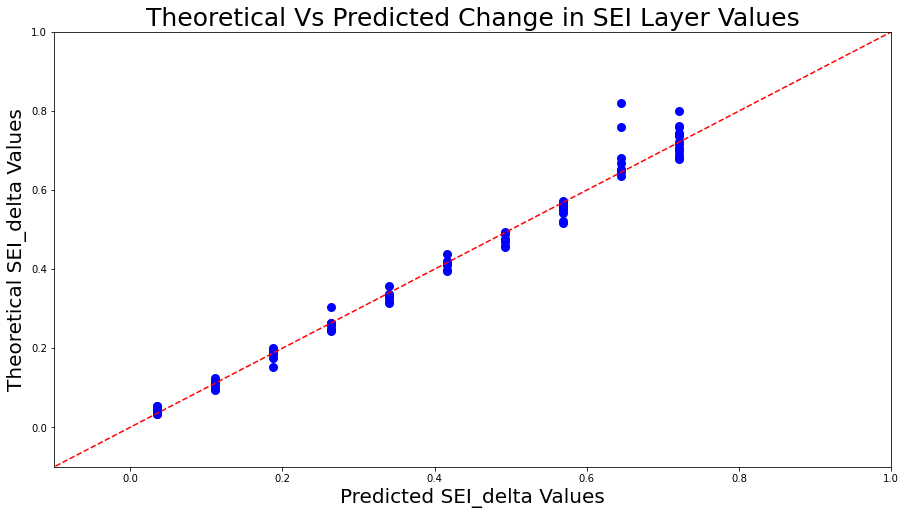

In [48]:
plt.figure(figsize=(15,8))
plt.scatter(test_predict1[:100], y_test1[:100],linewidths=3,color='blue')
plt.plot(range(-1,2),range(-1,2),'r--')
plt.ylim([-0.1,1])
plt.xlim([-0.1,1])
plt.xlabel('Predicted SEI_delta Values',fontsize=20)
plt.ylabel('Theoretical SEI_delta Values',fontsize=20)
plt.title('Theoretical Vs Predicted Change in SEI Layer Values',fontsize=25)

# Real Life Use-Case of above Model
### In this use case we are going to predict the change in SEI_layer for the New-York Taxi batteries considering their Power Values measured during the course of time.

#### Reading Dataset for NY_Taxi Battery Power Details

In [49]:
Ny_taxi = pd.read_csv('NYcityTaxi-Power.csv')

In [50]:
print(Ny_taxi.shape)
Ny_taxi.head()

(599, 3)


,Time (sec),normalized Power,Power(kW)
0,0,0.0,0.0
1,1,0.0,0.0
2,2,0.0,0.0
3,3,0.0,0.0
4,4,0.0,0.0


## Using the previously fitted Linear Regression Model (LReg1) to predict the SEI_delta (change in Solid-Electrolyte Interphase Layer) in the Taxi-Batteries.

In [51]:
Sei_layer_predict = pd.DataFrame(LReg1.predict(pd.DataFrame(Ny_taxi['normalized Power'])), columns=['Predicted SEI Layer'])

### Predicted Values :

In [52]:
Sei_layer_predict.head()

,Predicted SEI Layer
0,0.034502
1,0.034502
2,0.034502
3,0.034502
4,0.034502


In [53]:
predicted_sei = Ny_taxi.merge(Sei_layer_predict, on=Sei_layer_predict.index)
predicted_sei.drop('key_0',axis=1,inplace=True)

In [54]:
predicted_sei.tail(50)

,Time (sec),normalized Power,Power(kW),Predicted SEI Layer
549,549,0.188378,7.104439,0.163798
550,550,0.135033,5.092605,0.127184
551,551,-0.006031,-0.227468,0.030362
552,552,-0.061777,-2.329835,-0.007899
553,553,-0.399386,-15.062361,-0.239622
554,554,-0.553222,-20.864108,-0.345210
555,555,-0.553248,-20.865085,-0.345227
556,556,-0.497130,-18.748649,-0.306710
557,557,-0.432021,-16.293159,-0.262022
558,558,-0.408723,-15.414472,-0.246030


# Line-Plot to depict the change in SEI Layer with respect to Time(in sec) in          NY-Taxi Batteries.

Text(0.5, 1.0, 'Time(in Seconds) Vs Change in SEI Layer ')

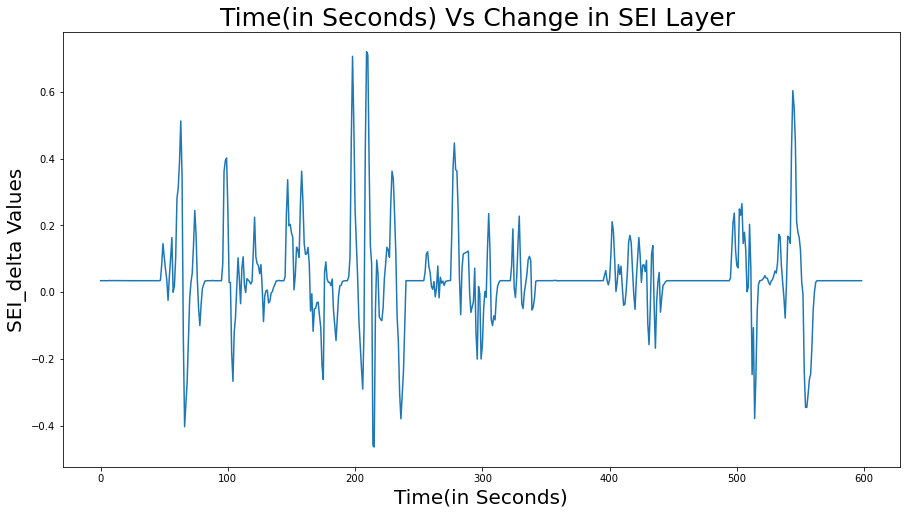

In [55]:
plt.figure(figsize=(15,8))
sns.lineplot(x=predicted_sei['Time (sec)'],y=predicted_sei['Predicted SEI Layer'])
plt.xlabel('Time(in Seconds)',fontsize=20)
plt.ylabel('SEI_delta Values',fontsize=20)
plt.title('Time(in Seconds) Vs Change in SEI Layer ',fontsize=25)

# ScatterPlot to depict the change in SEI_Layer with respect to the change in NY-Taxi Battery Power

Text(0.5, 1.0, 'Power(Kw) Vs Change in SEI Layer ')

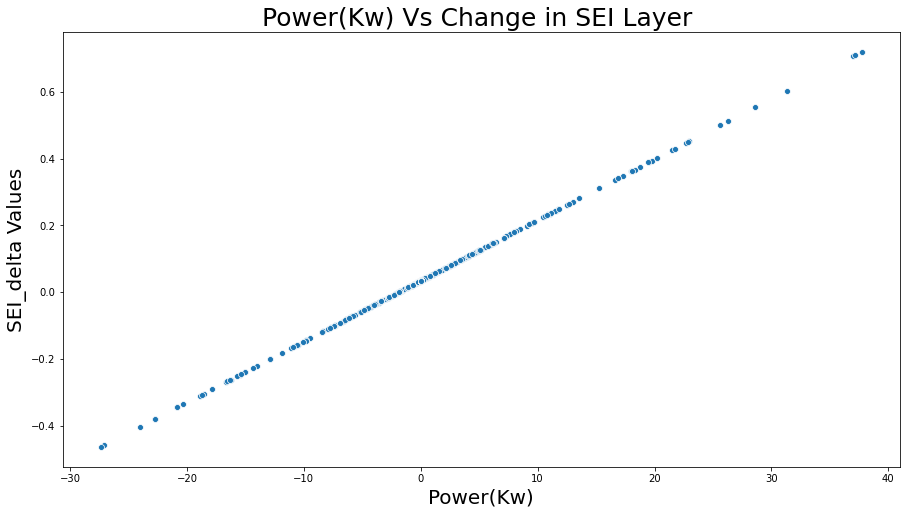

In [56]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=predicted_sei['Power(kW)'],y=predicted_sei['Predicted SEI Layer'])
plt.xlabel('Power(Kw)',fontsize=20)
plt.ylabel('SEI_delta Values',fontsize=20)
plt.title('Power(Kw) Vs Change in SEI Layer ',fontsize=25)

# Distribution of change in SEI Layer values throughout the Analysis.

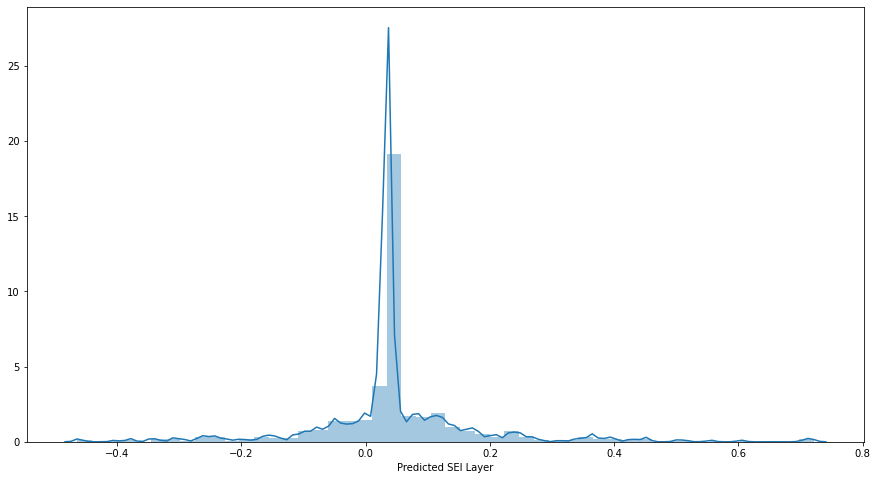

In [57]:
plt.figure(figsize=(15,8))
sns.distplot(predicted_sei['Predicted SEI Layer'],bins=50)

In [58]:
print('Change in SEI_layer when the Normalized Power Value is 0.18 = ',LReg1.predict([[0.18]])[0,0])

Change in SEI_layer when the Normalized Power Value is 0.18 =  0.15804730515512078


In [59]:
input_sheet={}    
def parse_contents(contents,filename):
    content_type, content_string = contents.split(',')
    
    decoded = base64.b64decode(content_string)
    try:
        if 'csv' in filename:
            # Assume that the user uploaded a CSV file
            df = pd.read_csv(
                io.StringIO(decoded.decode('utf-8')))
        elif 'xls' in filename:
            # Assume that the user uploaded an excel file
            df = pd.read_excel(io.BytesIO(decoded))
    except Exception as e:
        print(e)
        
        return html.Div([
            'There was an error processing this file.'
        ])
    if filename == 'NYcityTaxi-Power.csv':
        input_sheet['Taxi-Power-Data'] = df   
    newdf=df.round(2)
    return html.Div([
        dbc.Table.from_dataframe(newdf[:10], striped=True, bordered=True, hover=True,dark=True),
        html.Hr(),  # horizontal line
    ])



def dash_table_parser(df,filename):
    df=df.round(2)
    return html.Div([
        html.H5(filename),
        dbc.Table.from_dataframe(df, striped=True, bordered=True, hover=True, dark=True)
    ])

In [ ]:
import base64
import datetime
import io

import dash
from dash.dependencies import Input, Output, State
import dash_core_components as dcc
import dash_html_components as html
import dash_table
from dash_table.Format import Format, Group, Scheme, Symbol
import dash_bootstrap_components as dbc
import plotly.express as px
from plotly.tools import mpl_to_plotly

image_bg = 'D://Work Files//Einnel//submission//assets//bg.jpg'
encoded_bg = base64.b64encode(open(image_bg, 'rb').read())

image_logo = 'D://Work Files//Einnel//submission//assets//logo.png' # replace with your own image
encoded_logo = base64.b64encode(open(image_logo, 'rb').read())

app = dash.Dash(external_stylesheets=[dbc.themes.SLATE])
colors = {'background': '#01151a','text': '#beeefa'}

app.layout = html.Div([
    html.Div(style={'backgroundColor': colors['background']}, children=[
   html.P([html.Img(className="logo-img",src='data:image/png;base64,{}'.format(encoded_logo.decode())),
            "Solid Electrolyte Interphase Layer Analysis ToolKit"] ,className='title')]),
    html.P("The formation of the passivating SEI layer is a fundamental factor in the design and functioning of high-performance batteries. The role of the SEI layer involves the prevention of further electrolyte decomposition to maintain cycling ability. This requires that the SEI layer is well adhered to the electrode material, has good electronic insulation properties and the ability to conduct lithium ions.To enhance lithium-ion battery operation, the quality of the SEI layer on both the positive and negative electrode surfaces must be tuned. This is because variation in porosity and thickness affect the conductivity of lithium ions through the SEI layer.",className='para'),
    
             html.H3("Upload Taxi Battery Power Data",className='title-sub'),
             dcc.Upload(
             id='taxi-power-data',
             children=html.Div([
            'Drag and Drop or ',
            html.A('Select Files')
            ]),
        style={
            'width': '100%',
            'height': '60px',
            'lineHeight': '60px',
            'borderWidth': '1px',
            'borderStyle': 'dashed',
            'borderRadius': '5px',
            'textAlign': 'center',
            'margin': '10px'
        },
        # Allow multiple files to be uploaded
        multiple=False
    ),
    html.Div(id='output-data-upload-1'),
    #Button
    html.H3("Predict SEI Layer"),
    
    dbc.Button("Submit", id='submit-val',color="success",className="mr-3",size="lg",block=True),
    
    html.Div(id='output-data-upload-2',
             children='Enter a value and press submit'),
    dbc.Button("Visualise Battery Status", id='submit-vis',color="success",className="mr-3",size="lg",block=True),
    html.Div(id='output-data-upload-3'),
    html.Div( children=[
    html.Img(className='bg',src='data:image/png;base64,{}'.format(encoded_bg.decode())) ])
    ])


#Display Datasheet
@app.callback(Output('output-data-upload-1', 'children'),
              [Input('taxi-power-data', 'contents')],[State('taxi-power-data', 'filename')])
def update_output(list_of_contents,filename):
    if list_of_contents is not None:
        children = [parse_contents(list_of_contents,filename)]
        return children
#===================================================================================================#    

@app.callback(Output('output-data-upload-2','children'),
            [Input('submit-val', 'n_clicks')])
#              [State('input-on-submit', 'value')])

def update_datatable(n_clicks): 
    if n_clicks:
        Sei_layer_predict = pd.DataFrame(LReg1.predict(pd.DataFrame(input_sheet['Taxi-Power-Data']['normalized Power'])), columns=['Predicted SEI Layer'])
        
        predicted_sei = input_sheet['Taxi-Power-Data'].merge(Sei_layer_predict, on=Sei_layer_predict.index)
        predicted_sei.drop('key_0',axis=1,inplace=True)
        
        
        fig = plt.figure(figsize=(15,8))
        fig = sns.lineplot(x=predicted_sei['Time (sec)'],y=predicted_sei['Predicted SEI Layer'])
        plt.xlabel('Time(in Seconds)',fontsize=20)
        plt.ylabel('SEI_delta Values',fontsize=20)
        plt.title('Time(in Seconds) Vs Change in SEI Layer ',fontsize=25)
        
        pic_IObytes = io.BytesIO()
        plt.savefig(pic_IObytes,  format='png')
        pic_IObytes.seek(0)
        pic_hash = base64.b64encode(pic_IObytes.read())
        
        return [dash_table_parser(predicted_sei[:10],'Output SEI Layer Generation Table')]
    
@app.callback(Output('output-data-upload-3','children'),
            [Input('submit-vis', 'n_clicks')])
#              [State('input-on-submit', 'value')])

def update_graph(n_clicks): 
    if n_clicks:
        Sei_layer_predict = pd.DataFrame(LReg1.predict(pd.DataFrame(input_sheet['Taxi-Power-Data']['normalized Power'])), columns=['Predicted SEI Layer'])
        
        predicted_sei = input_sheet['Taxi-Power-Data'].merge(Sei_layer_predict, on=Sei_layer_predict.index)
        predicted_sei.drop('key_0',axis=1,inplace=True)
        
        sns.set_style('whitegrid')
        fig = plt.figure(figsize=(15,8))
        fig = sns.lineplot(x=predicted_sei['Time (sec)'],y=predicted_sei['Predicted SEI Layer'])
        plt.xlabel('Time(in Seconds)',fontsize=20)
        plt.ylabel('SEI_delta Values',fontsize=20)
        plt.title('Time(in Seconds) Vs Change in SEI Layer ',fontsize=25)
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)
        
        pic_IObytes = io.BytesIO()
        plt.savefig(pic_IObytes,  format='png')
        pic_IObytes.seek(0)
        pic_hash = base64.b64encode(pic_IObytes.read())
        
        return html.Img(src='data:image/png;base64,{}'.format(pic_hash.decode()))








if __name__ == '__main__':
    app.run_server(debug=False)


Dash is running on http://127.0.0.1:8050/

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\sudar\anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\sudar\anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\sudar\anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\sudar\anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\sudar\anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\sudar\anaconda3\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\sudar\AppData\Roaming\Python\Python38\site-packages\dash\dash.py", line 1059, in dispatch


127.0.0.1 - - [09/Dec/2020 21:15:19] "POST /_dash-update-component HTTP/1.1" 500 -
127.0.0.1 - - [09/Dec/2020 21:15:24] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [09/Dec/2020 21:15:24] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [09/Dec/2020 21:15:24] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [09/Dec/2020 21:15:24] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [09/Dec/2020 21:15:24] "GET /_favicon.ico?v=1.16.1 HTTP/1.1" 200 -
127.0.0.1 - - [09/Dec/2020 21:15:24] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [09/Dec/2020 21:15:24] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [09/Dec/2020 21:15:28] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [09/Dec/2020 21:15:31] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [09/Dec/2020 21:15:36] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [09/Dec/2020 21:15:44] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [09/Dec/2020 21:15:44] "GET /_dash-dependencies HTTP/1